<a href="https://colab.research.google.com/github/1394jay/ALY6110/blob/main/ALY6110-Module4%23ParekhJay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
df = spark.sql("show databases")
df.show()


+---------+
|namespace|
+---------+
|  default|
+---------+



In [ ]:
from google.colab import files
files.upload()

Saving BostonHousing.csv to BostonHousing.csv


{'BostonHousing.csv': b'"crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","b","lstat","medv"\n0.00632,18,2.31,"0",0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24\n0.02731,0,7.07,"0",0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6\n0.02729,0,7.07,"0",0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7\n0.03237,0,2.18,"0",0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4\n0.06905,0,2.18,"0",0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2\n0.02985,0,2.18,"0",0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7\n0.08829,12.5,7.87,"0",0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9\n0.14455,12.5,7.87,"0",0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1\n0.21124,12.5,7.87,"0",0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5\n0.17004,12.5,7.87,"0",0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1,18.9\n0.22489,12.5,7.87,"0",0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15\n0.11747,12.5,7.87,"0",0.524,6.009,82.9,6.2267,5,311,15.2,396.9,13.27,18.9\n0.09378,12

In [ ]:
# Read the given CSV file
dataset =spark.read.csv('BostonHousing.csv',inferSchema=True,header='true')

In [ ]:
#Show the first 5 elements of your dataset
dataset.limit(5).show()


+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+



In [ ]:
# Show the Schema of your dataset
dataset.printSchema()

root
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- b: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



In [ ]:
dataset.describe().show()

+-------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|summary|              crim|                zn|             indus|              chas|                nox|                rm|               age|              dis|              rad|               tax|           ptratio|                 b|             lstat|              medv|
+-------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|  count|               506|               506|               506|               506|                506|               506|               506|              506|              

In [ ]:
from pyspark.sql.functions import col,isnan, when, count

#Making sure there are no null/missing values
dataset.select([count(when(isnan(c), c)).alias(c) for c in dataset.columns]).show()
dataset.dtypes

+----+---+-----+----+---+---+---+---+---+---+-------+---+-----+----+
|crim| zn|indus|chas|nox| rm|age|dis|rad|tax|ptratio|  b|lstat|medv|
+----+---+-----+----+---+---+---+---+---+---+-------+---+-----+----+
|   0|  0|    0|   0|  0|  0|  0|  0|  0|  0|      0|  0|    0|   0|
+----+---+-----+----+---+---+---+---+---+---+-------+---+-----+----+



[('crim', 'double'),
 ('zn', 'double'),
 ('indus', 'double'),
 ('chas', 'int'),
 ('nox', 'double'),
 ('rm', 'double'),
 ('age', 'double'),
 ('dis', 'double'),
 ('rad', 'int'),
 ('tax', 'int'),
 ('ptratio', 'double'),
 ('b', 'double'),
 ('lstat', 'double'),
 ('medv', 'double')]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

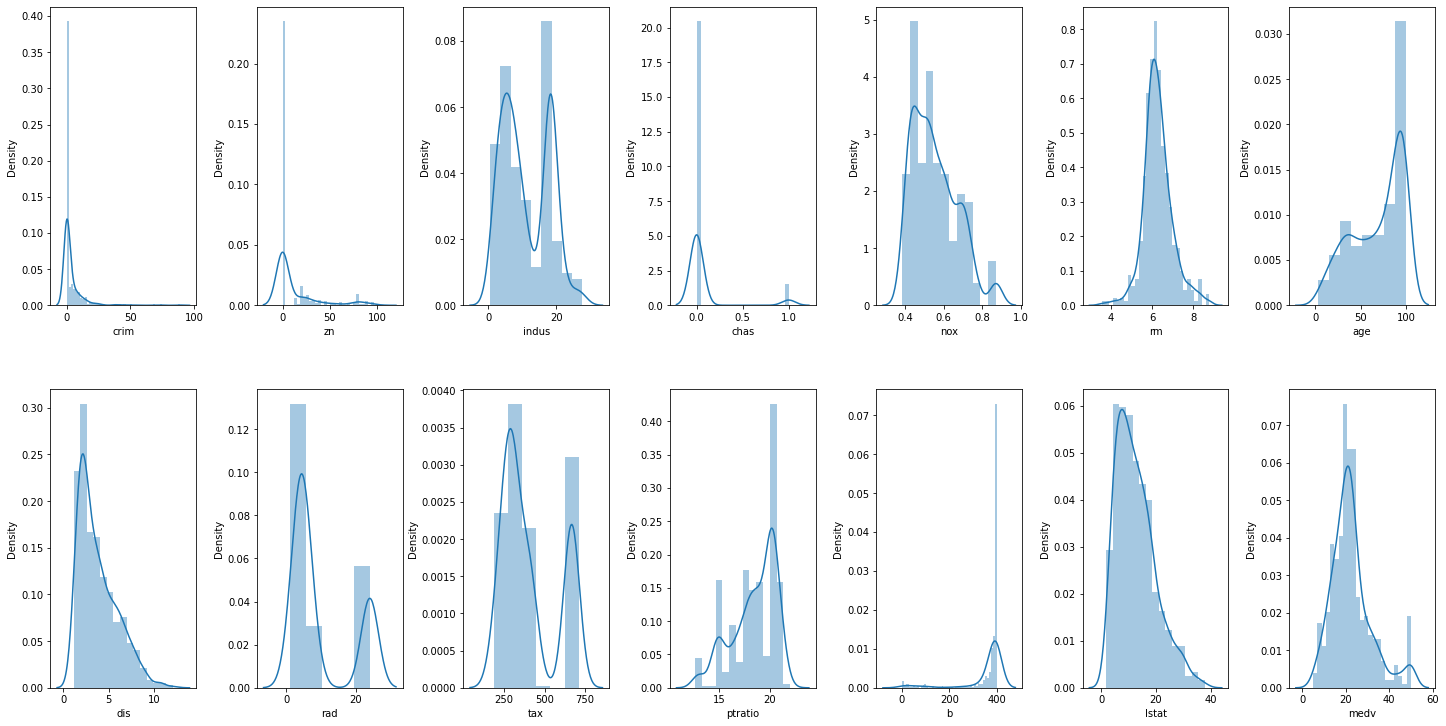

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Convert  Spark Dataframe to Pandas Dataframe
pandas_df = dataset.toPandas()

#Plotting histogram for each column
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in pandas_df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


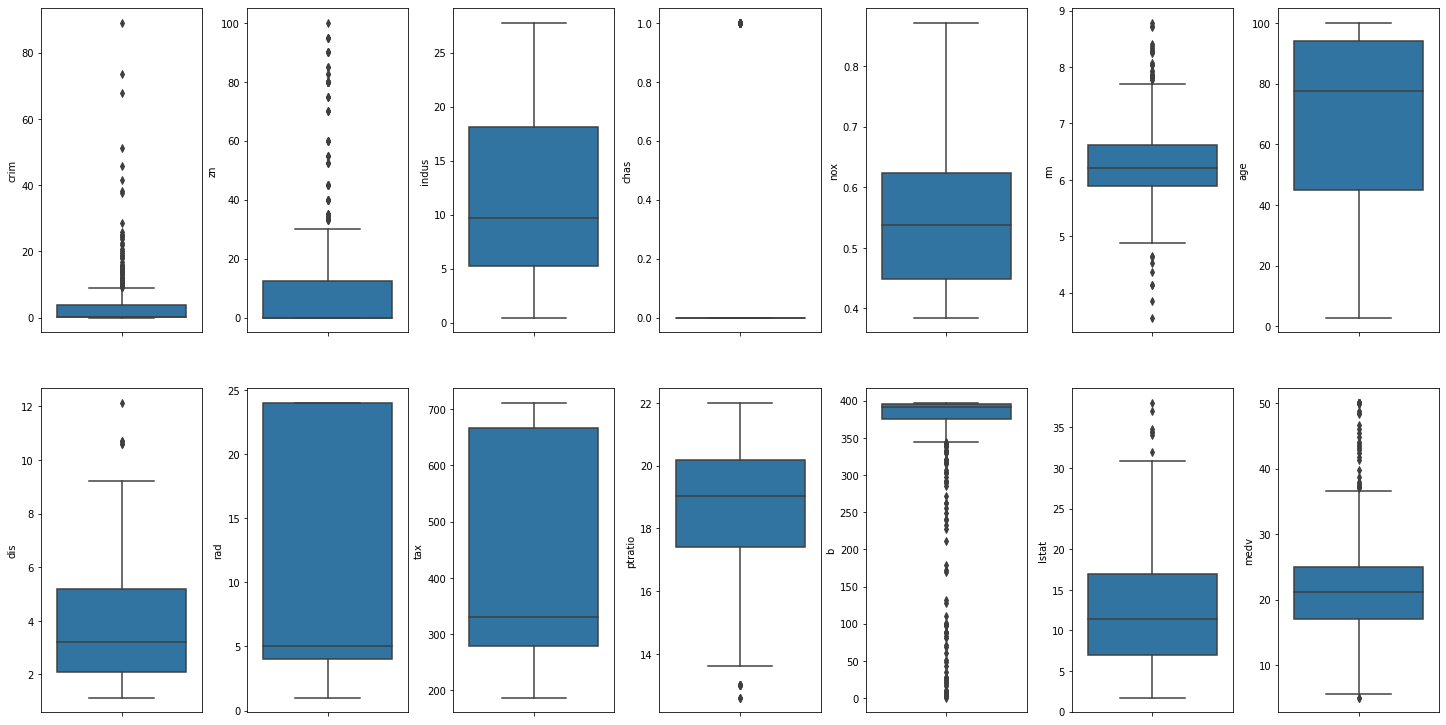

In [ ]:
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in pandas_df.items():
    sns.boxplot(y=k, data=pandas_df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


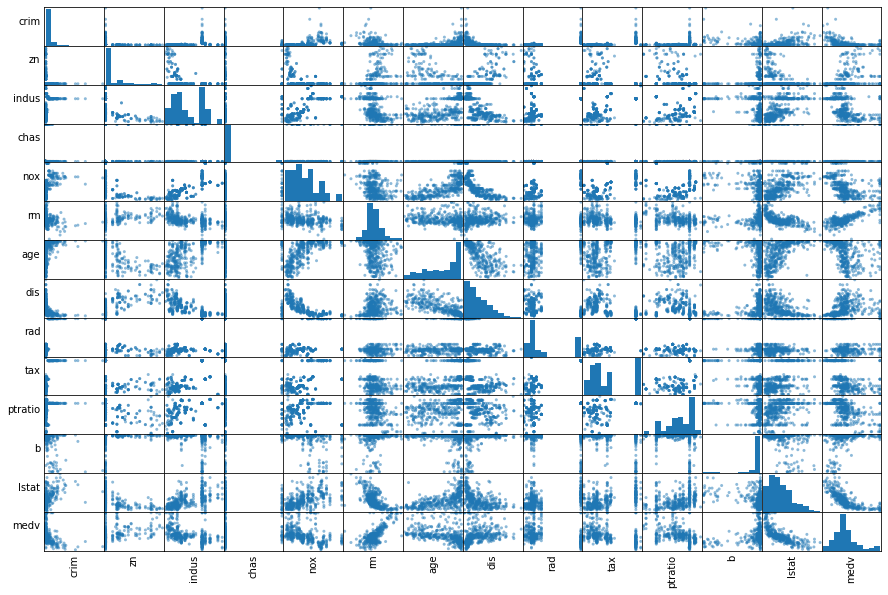

In [ ]:
import pandas as pd
from pandas.plotting import scatter_matrix
numeric_features = [t[0] for t in dataset.dtypes if t[1] == 'int' or t[1] == 'double']
sampled_data = dataset.select(numeric_features).sample(False, 0.8).toPandas()
axs = scatter_matrix(sampled_data, figsize=(15, 10))
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [31]:
import six
for i in dataset.columns:
    if not( isinstance(dataset.select(i).take(1)[0][0], six.string_types)):
        print( "Correlation to medv for ", i, dataset.stat.corr('medv',i))

Correlation to medv for  crim -0.38830460858681154
Correlation to medv for  zn 0.3604453424505433
Correlation to medv for  indus -0.4837251600283728
Correlation to medv for  chas 0.1752601771902987
Correlation to medv for  nox -0.4273207723732821
Correlation to medv for  rm 0.6953599470715401
Correlation to medv for  age -0.3769545650045961
Correlation to medv for  dis 0.249928734085904
Correlation to medv for  rad -0.38162623063977735
Correlation to medv for  tax -0.46853593356776674
Correlation to medv for  ptratio -0.5077866855375622
Correlation to medv for  b 0.3334608196570661
Correlation to medv for  lstat -0.7376627261740145
Correlation to medv for  medv 1.0


IllegalArgumentException: ignored

In [32]:
import pyspark.sql.functions as f
dataset = dataset.withColumn("chas_boolean", f.when( f.col("chas") == 1 ,True).when(f.col("chas") == 0, False))
dataset.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+------------+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|chas_boolean|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+------------+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|       false|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|       false|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|       false|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|       false|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|       false|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+------------+
only showing top 5 rows



In [21]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols = ['crim', 'zn', 'indus', 'chas_boolean', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat'], outputCol = 'features')
vhouse_df = vectorAssembler.transform(dataset)
vhouse_df = vhouse_df.select(['features', 'medv'])
vhouse_df.show(3)

+--------------------+----+
|            features|medv|
+--------------------+----+
|[0.00632,18.0,2.3...|24.0|
|[0.02731,0.0,7.07...|21.6|
|[0.02729,0.0,7.07...|34.7|
+--------------------+----+
only showing top 3 rows



In [22]:
splits = vhouse_df.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]

In [23]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='medv', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(train_df)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [-0.04752649124382128,0.0,0.0,2.2155267420876386,-4.137608113440856,5.093550268557414,0.0,-0.36663575853722324,0.0,-0.0010801842163451498,-0.8626352037366497,0.007797837707781747,-0.41559678410473694]
Intercept: 12.9273152765183


In [24]:
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 4.735222
r2: 0.720171


In [26]:
lr_predictions = lr_model.transform(test_df)
lr_predictions.select("prediction","medv","features").show(5)
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="medv",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

+------------------+----+--------------------+
|        prediction|medv|            features|
+------------------+----+--------------------+
| 32.51879999701613|32.7|[0.01301,35.0,1.5...|
|30.396983065897523|35.4|[0.01311,90.0,1.2...|
|16.773329994387055|18.9|[0.0136,75.0,4.0,...|
| 38.36381645994212|50.0|[0.01381,80.0,0.4...|
| 34.68129552780425|44.0|[0.01538,90.0,3.7...|
+------------------+----+--------------------+
only showing top 5 rows

R Squared (R2) on test data = 0.683442


In [27]:
test_result = lr_model.evaluate(test_df)
print("Root Mean Squared Error (RMSE) on test data = %g" % test_result.rootMeanSquaredError)

Root Mean Squared Error (RMSE) on test data = 5.40908


In [33]:
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show(5)

numIterations: 11
objectiveHistory: [0.5, 0.4313816655089507, 0.23050521084563774, 0.2076876979082006, 0.17774754064691714, 0.17585950591429034, 0.17558572249920723, 0.17535945085349683, 0.1747684808043551, 0.174721799398938, 0.17468409069718505]
+-------------------+
|          residuals|
+-------------------+
| -6.198771163578289|
| 1.1948351077284975|
| -5.642054319447059|
| 0.5886085672778734|
|-0.8987022810940068|
+-------------------+
only showing top 5 rows



In [30]:
predictions = lr_model.transform(test_df)
predictions.select("prediction","medv","features").show()

+------------------+----+--------------------+
|        prediction|medv|            features|
+------------------+----+--------------------+
| 32.51879999701613|32.7|[0.01301,35.0,1.5...|
|30.396983065897523|35.4|[0.01311,90.0,1.2...|
|16.773329994387055|18.9|[0.0136,75.0,4.0,...|
| 38.36381645994212|50.0|[0.01381,80.0,0.4...|
| 34.68129552780425|44.0|[0.01538,90.0,3.7...|
|25.808215108478752|23.1|[0.0187,85.0,4.15...|
| 39.17567079786568|50.0|[0.02009,95.0,2.6...|
| 36.40624606753965|42.3|[0.02177,82.5,2.0...|
|27.071191314503444|16.5|[0.02498,0.0,1.89...|
|26.507897409669972|26.6|[0.02899,40.0,1.2...|
|26.096726372519868|28.7|[0.02985,0.0,2.18...|
|29.937124755451272|33.4|[0.03237,0.0,2.18...|
| 22.60270023270536|20.9|[0.03548,80.0,3.6...|
|23.826256157301973|22.9|[0.03551,25.0,4.8...|
| 27.79493871296102|23.5|[0.03584,80.0,3.3...|
|27.433729210241964|27.9|[0.03615,80.0,4.9...|
| 24.89097003844014|24.8|[0.03659,25.0,4.8...|
|26.171412044516025|22.9|[0.04203,28.0,15....|
|24.211813081